In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from mtist import infer_mtist as im
from mtist import mtist_utils as mu
from mtist import graphing_utils as gu

from glob import glob

%config InlineBackend.figure_format='retina'

plt.rcParams["svg.fonttype"] = "none"
# plt.rcParams.update({"font.family": "Computer Modern"})

rng = np.random.default_rng(11206)

In [10]:
# meta = (
#     pd.read_csv("../mtist1.0/mtist_datasets/mtist_metadata.csv")
#     .drop(columns=["Unnamed: 0"])
#     .set_index("did")
# )

meta2 = (
    pd.read_csv("../mtist1.0/mtist_datasets3/mtist_metadata.csv")
    .drop(columns=["Unnamed: 0"])
    .set_index("did")
)

meta_food = (
    pd.read_csv("../mtist1.0/mtist_datasets_food/mtist_metadata.csv")
    .drop(columns=["Unnamed: 0"])
    .set_index("did")
)

meta_nofood = (
    pd.read_csv("../mtist1.0/mtist_datasets_nofood/mtist_metadata.csv")
    .drop(columns=["Unnamed: 0"])
    .set_index("did")
)

In [11]:
###########################################################################################################
# Obtain normal ES Scores for 
############################################################################################################


methods = ["default", "default_ignore_food"]#, "ridge_CV", "lasso_CV", "elasticnet_CV", "mkseqspike"]
labels = ["L"]#, "L2", "L1", "E", "MK"]

################################################################################

# es = {
#     method: pd.read_csv(
#         f"../mtist1.0/mtist_datasets/{method}_inference_result/{method}_es_scores.csv"
#     )["raw"]
#     for method in ["default", "default2"]
# }

es2 = {
    method: pd.read_csv(
        f"../mtist1.0/mtist_datasets3/{method}_inference_result/{method}_es_scores.csv"
    )["raw"]
    for method in ["ridge_CV", "ridge_CV2"]
}

es_food = {
    method: pd.read_csv(
        f"../mtist1.0/mtist_datasets_food/{method}_inference_result/{method}_es_scores.csv"
    )["raw"]
    for method in methods
}

es_nofood = {
    method: pd.read_csv(
        f"../mtist1.0/mtist_datasets_nofood/{method}_inference_result/{method}_es_scores.csv"
    )["raw"]
    for method in methods
}

In [12]:
expanded_nulls = {
    n_species: pd.read_csv(f"null_models/null_df_{n_species}sp.csv")
    .drop(columns=["Unnamed: 0"])[f"{n_species}-sp_null"]
    .values
    for n_species in [3]#, 10, 100]
}

# expanded_nulls_strong = {
#     n_species: pd.read_csv(f"null_models/null_df_{n_species}sp_strong.csv")
#     .drop(columns=["Unnamed: 0"])[f"{n_species}-sp_null"]
#     .values
#     for n_species in [100]
# }

display(expanded_nulls)
# display(expanded_nulls_strong)

{3: array([0.33333333, 0.55555556, 0.66666667, ..., 0.66666667, 0.44444444,
        0.33333333])}

In [13]:
# data = pd.DataFrame(es)
data2 = pd.DataFrame(es2)
data_food = pd.DataFrame(es_food)
data_nofood = pd.DataFrame(es_nofood)

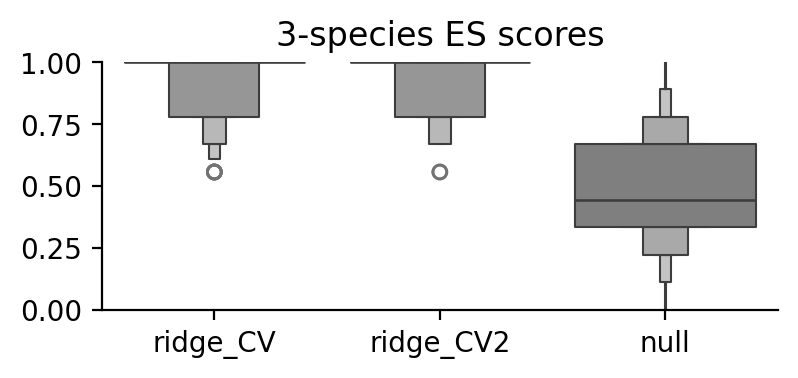

In [14]:
order = ["ridge_CV", "ridge_CV2"] + ["null"]

fig, ax = gu.easy_subplots(nrows=1, base_figsize=(4, 2), sharex=True, sharey=False)

# for n_species, ax in zip([3], axes):
n_species = 3
# ax = axes[0]
sns.boxenplot(
data=(
    pd.Series(expanded_nulls[n_species])
    .to_frame("null")
    .join(data2.loc[meta2.query("n_species == @n_species").index])[order]
),
ax=ax,
color="tab:gray",
)

ax.set_title(f"{n_species}-species ES scores")

# plt.xticks(range(len(order)), labels + ["Null"])

# ax[1].set_ylim(0, 1)
ax.set_ylim(0, 1)
# ax[2].set_ylim(0.44, 0.56)
# ax[2].set_yticks(np.around(np.linspace(0.40, 0.60, 5), decimals=2))

sns.despine()
plt.tight_layout()

# gu.savefig(
#     fig,
#     os.path.join("exported_figures", "figure_4bc", "figure_4b"),
#     ft="svg",
# )

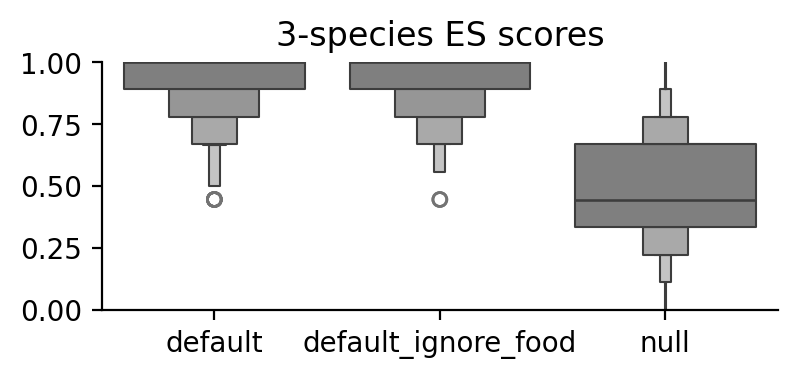

In [15]:
order = methods + ["null"]

fig, ax = gu.easy_subplots(nrows=1, base_figsize=(4, 2), sharex=True, sharey=False)

# for n_species, ax in zip([3], axes):
n_species = 3
# ax = axes[0]
sns.boxenplot(
data=(
    pd.Series(expanded_nulls[n_species])
    .to_frame("null")
    .join(data_food.loc[meta_food.query("n_species == @n_species").index])[order]
),
ax=ax,
color="tab:gray",
)

ax.set_title(f"{n_species}-species ES scores")

# plt.xticks(range(len(order)), labels + ["Null"])

# ax[1].set_ylim(0, 1)
ax.set_ylim(0, 1)
# ax[2].set_ylim(0.44, 0.56)
# ax[2].set_yticks(np.around(np.linspace(0.40, 0.60, 5), decimals=2))

sns.despine()
plt.tight_layout()

# gu.savefig(
#     fig,
#     os.path.join("exported_figures", "figure_4bc", "figure_4b"),
#     ft="svg",
# )

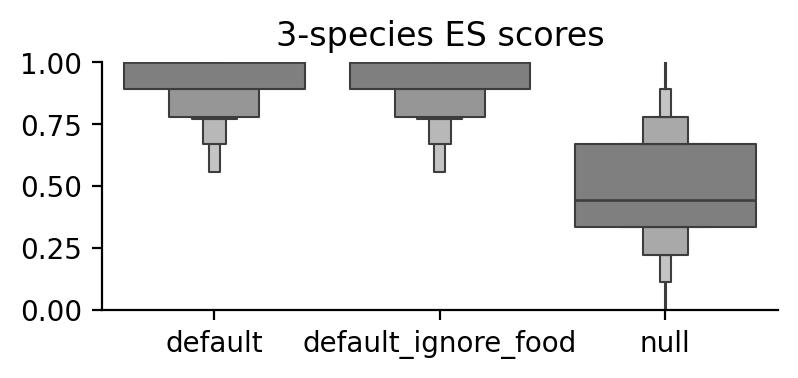

In [16]:
order = methods + ["null"]

fig, ax = gu.easy_subplots(nrows=1, base_figsize=(4, 2), sharex=True, sharey=False)

# for n_species, ax in zip([3], axes):
n_species = 3
# ax = axes[0]
sns.boxenplot(
data=(
    pd.Series(expanded_nulls[n_species])
    .to_frame("null")
    .join(data_nofood.loc[meta_nofood.query("n_species == @n_species").index])[order]
),
ax=ax,
color="tab:gray",
)

ax.set_title(f"{n_species}-species ES scores")

# plt.xticks(range(len(order)), labels + ["Null"])

# ax[1].set_ylim(0, 1)
ax.set_ylim(0, 1)
# ax[2].set_ylim(0.44, 0.56)
# ax[2].set_yticks(np.around(np.linspace(0.40, 0.60, 5), decimals=2))

sns.despine()
plt.tight_layout()

# gu.savefig(
#     fig,
#     os.path.join("exported_figures", "figure_4bc", "figure_4b"),
#     ft="svg",
# )

In [23]:
(np.diff(data2.values, axis=1)[np.diff(data2.values, axis=1)!=0]>0).mean()

np.float64(0.5351681957186545)

(array([12.,  1.,  2.,  7., 17., 88., 37., 87., 29., 21.,  7.,  3.,  0.,
        12.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([-0.11111111, -0.09444444, -0.07777778, -0.06111111, -0.04444444,
        -0.02777778, -0.01111111,  0.00555556,  0.02222222,  0.03888889,
         0.05555556,  0.07222222,  0.08888889,  0.10555556,  0.12222222,
         0.13888889,  0.15555556,  0.17222222,  0.18888889,  0.20555556,
         0.22222222]),
 <BarContainer object of 20 artists>)

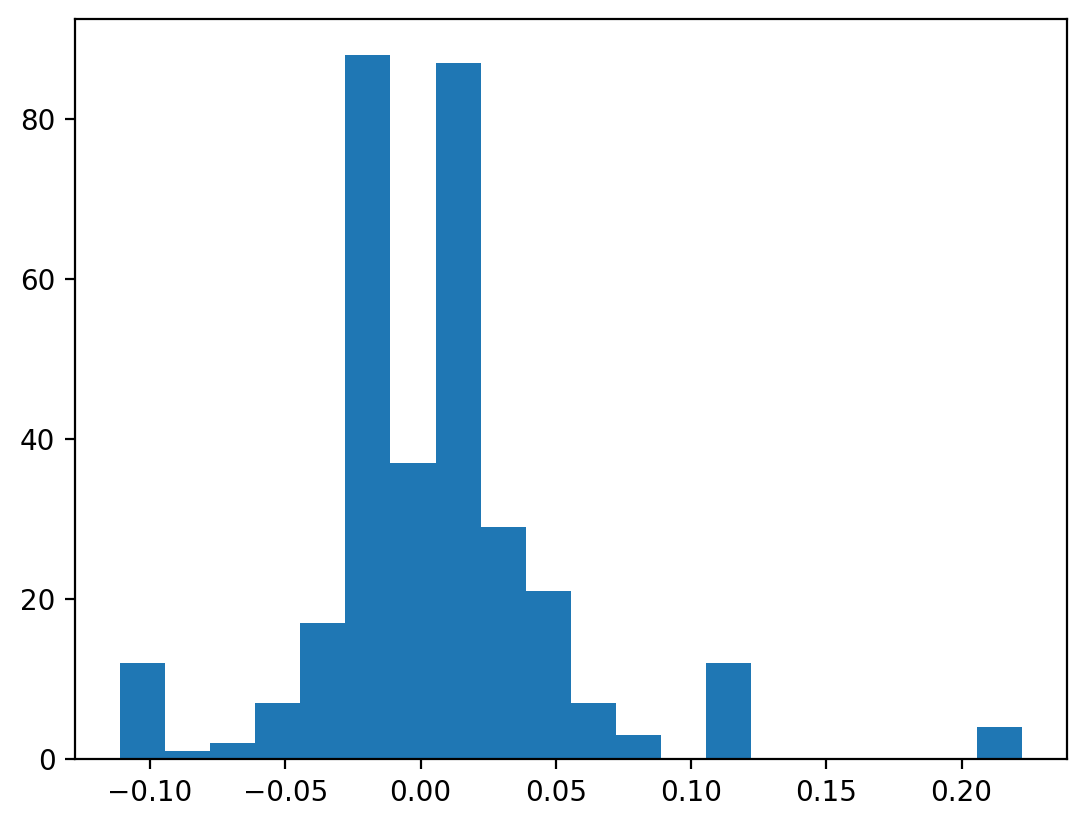

In [24]:
plt.hist(np.diff(data2.values, axis=1)[np.diff(data2.values, axis=1)!=0], 20, align="mid")

(array([[ 36.,   7.,   9.,  37.,  44.,  67.,  46.,  86.,  63., 253.],
        [ 35.,   5.,  10.,  40.,  38.,  70.,  52.,  78.,  68., 252.]]),
 array([0.4978355 , 0.54805195, 0.5982684 , 0.64848485, 0.6987013 ,
        0.74891775, 0.7991342 , 0.84935065, 0.8995671 , 0.94978355,
        1.        ]),
 <a list of 2 BarContainer objects>)

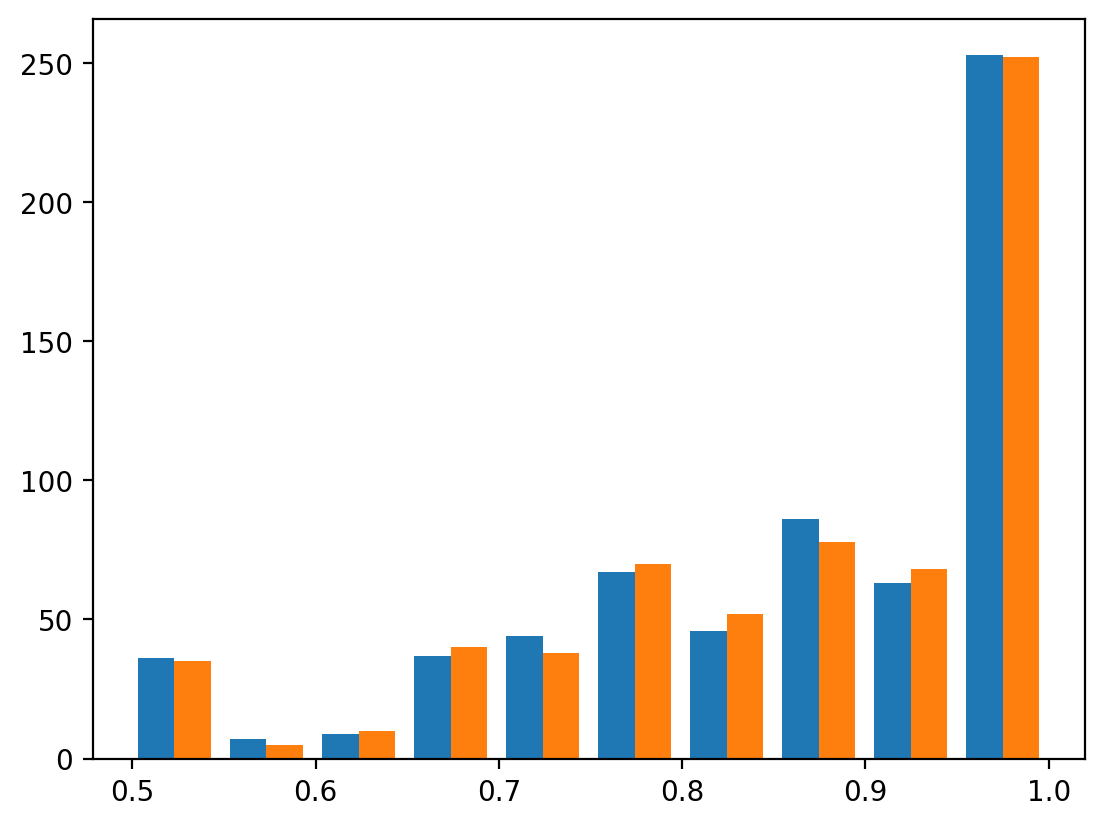

In [26]:
# plt.hist(data_nofood.values)
plt.hist(data2)
# plt.yscale("log")

(array([[  5.,   0.,   4.,   0.,  14.,   0.,  27.,   0.,  54., 184.],
        [  2.,   0.,   6.,   0.,  12.,   0.,  27.,   0.,  30., 211.]]),
 array([0.44444444, 0.5       , 0.55555556, 0.61111111, 0.66666667,
        0.72222222, 0.77777778, 0.83333333, 0.88888889, 0.94444444,
        1.        ]),
 <a list of 2 BarContainer objects>)

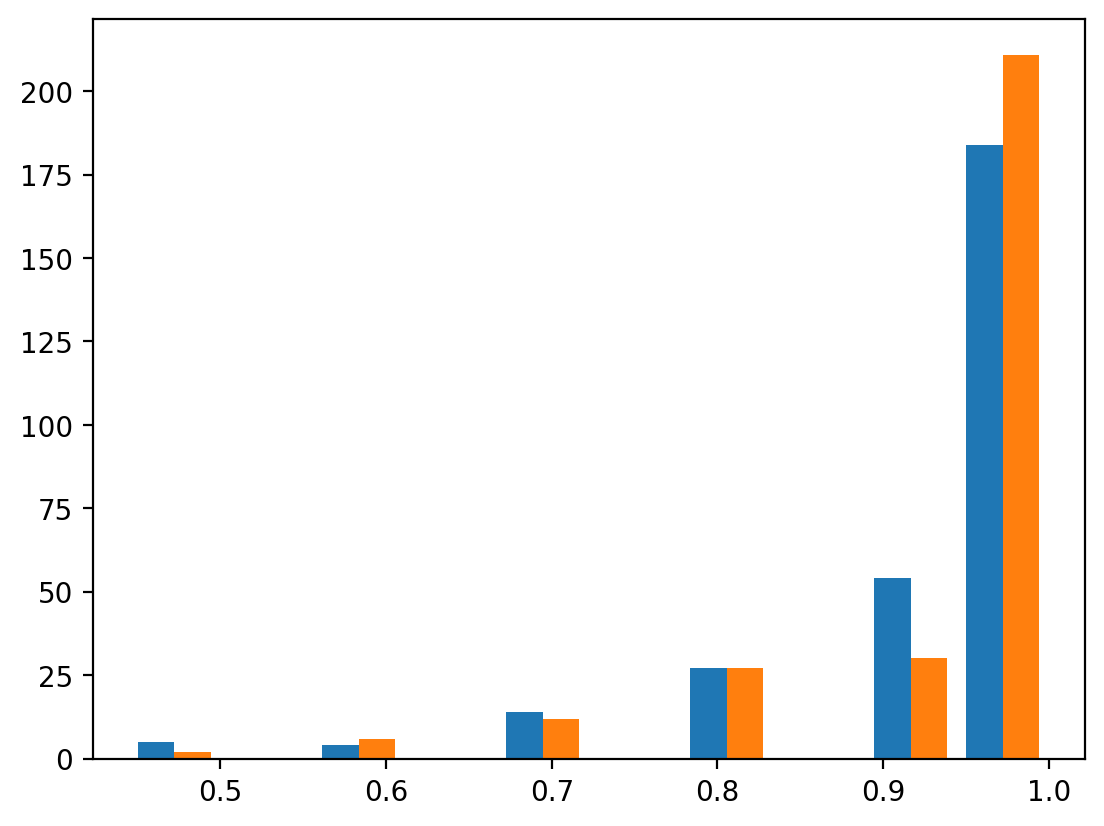

In [311]:
# plt.hist(data_nofood.values)
plt.hist(data_food)
# plt.yscale("log")

(array([[  8.,   0.,  10.,   0.,   0.,  21.,   0.,  36.,   0., 213.],
        [  8.,   0.,  10.,   0.,   0.,  22.,   0.,  35.,   0., 213.]]),
 array([0.55555556, 0.6       , 0.64444444, 0.68888889, 0.73333333,
        0.77777778, 0.82222222, 0.86666667, 0.91111111, 0.95555556,
        1.        ]),
 <a list of 2 BarContainer objects>)

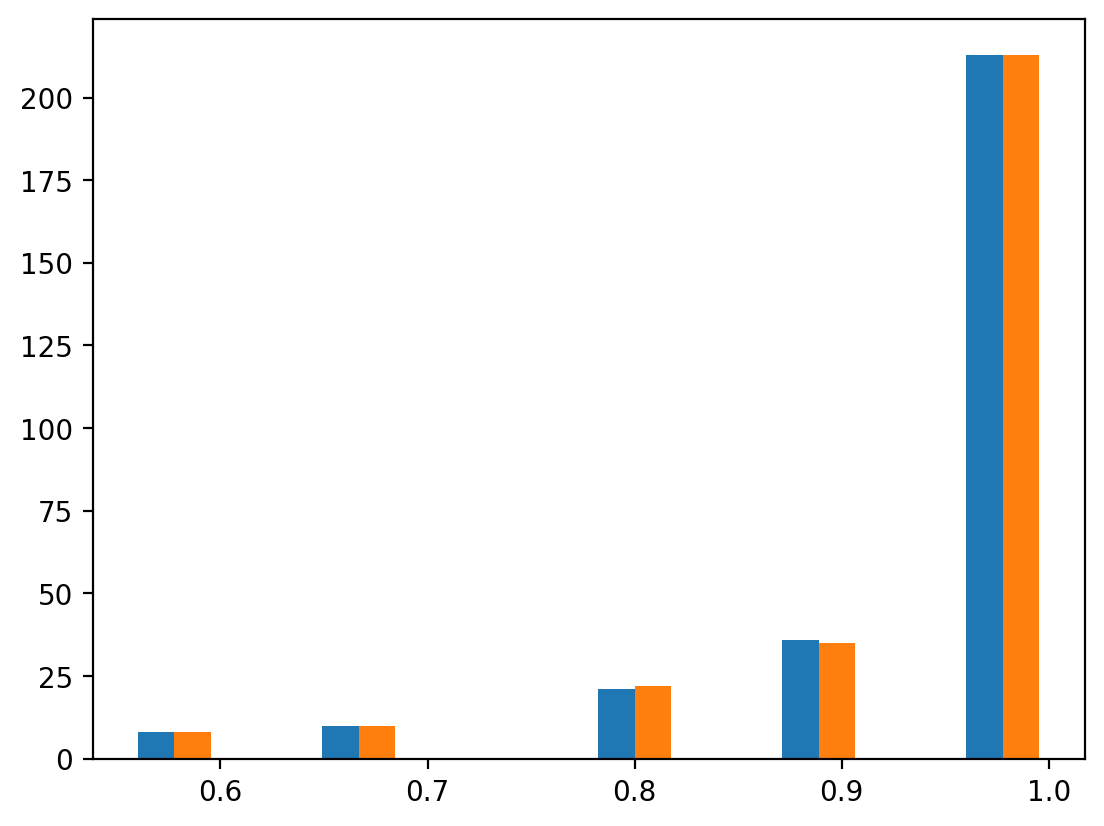

In [312]:
# plt.hist(data_nofood.values)
plt.hist(data_nofood.loc[meta_nofood.query("n_species == @n_species").index])
# plt.yscale("log")

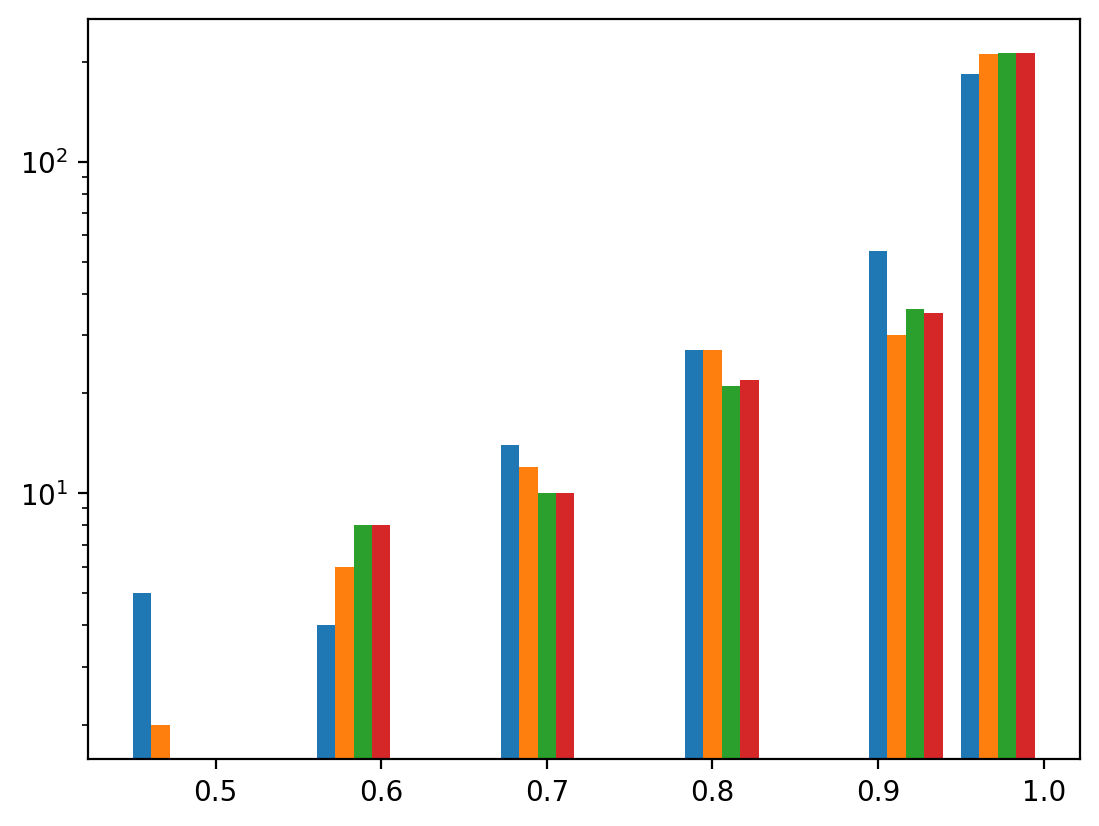

In [313]:
# plt.hist(data_nofood.values)
plt.hist(np.hstack([data_food.loc[meta_food.query("n_species == @n_species").index], 
                    data_nofood.loc[meta_nofood.query("n_species == @n_species").index]]))
plt.yscale("log")